In [1]:
%pip install seisbench

import matplotlib.pyplot as plt
import seisbench
import seisbench.data as sbd

Note: you may need to restart the kernel to use updated packages.


/storage/vast-gfz-hpc-01/home/khuzaima/project/seisbench/seisbench/__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [1]:
cfg = {'experiment_name': 'seismic_training', 'model': {'name': 'PhaseNet'}, 'augmentations': {'window_default': 'WindowAroundSample', 'samples_before': 3000, 'windowlen': 3001, 'selection': 'random', 'strategy': 'pad', '_target_': 'NullAugmentation', 'demean_axis': -1, 'amp_norm_axis': -1, 'amp_norm_type': 'peak', 'dtype': 'np.float32', 'sigma': 30, 'dim': 0, 'shape': 'gaussian'}, 'dataset': {'name': 'BohemiaSaxony', 'component_orders': 'ZNE', 'dimension_orders': None, 'sampling_rate': 100}, 
 'training': {'epochs': 50, 'batch_size': 1024, 'lr': 0.001, 'optimizer': 'Adam', 'num_workers': 16}}

In [ ]:
cfg[].window_default.samples_before

AttributeError: 'dict' object has no attribute 'augmentations'

In [2]:
data = sbd.DummyDataset(force=True)
print(data)

DummyDataset - 100 traces


In [9]:
data = sbd.LenDB()

In [3]:
metadata = data.metadata

In [4]:
import os

print("Cache root:", seisbench.cache_root)
print("Contents:", os.listdir(seisbench.cache_root))
print("datasets:", os.listdir(seisbench.cache_root / "datasets"))

Cache root: D:\thesis\dataset
Contents: ['config.json', 'datasets']
datasets: ['dummydataset', 'lendb']


In [4]:
data.metadata

,index,trace_name,trace_start_time,trace_category,trace_p_arrival_sample,trace_p_status,station_code,station_network_code,station_latitude_deg,station_longitude_deg,...,source_depth_km,source_origin_time,path_ep_distance_km,path_azimuth_deg,path_back_azimuth_deg,split,trace_name_original,trace_chunk,trace_sampling_rate_hz,trace_component_order
0,0,"bucket0$0,:3,:540",2012-11-29T18:21:44.099900Z,earthquake,80.0,estimated,319A,AE,31.375700,-109.280899,...,20.0,2012-11-29T18:21:27.400000Z,125.778865,17.614884,197.819975,train,AE_319A_1354213304.0999,,20,ZNE
1,1,"bucket0$1,:3,:540",2012-12-11T18:57:34.425000Z,earthquake,80.0,estimated,319A,AE,31.375700,-109.280899,...,20.0,2012-12-11T18:57:19.300000Z,114.350587,17.033169,197.213904,train,AE_319A_1355252254.425,,20,ZNE
2,2,"bucket0$2,:3,:540",2013-02-07T19:02:29.550000Z,earthquake,80.0,estimated,319A,AE,31.375700,-109.280899,...,3.0,2013-02-07T19:02:14.600000Z,109.835594,14.296218,194.442617,train,AE_319A_1360263749.5500002,,20,ZNE
3,3,"bucket0$3,:3,:540",2013-03-06T19:11:47.200000Z,earthquake,80.0,estimated,319A,AE,31.375700,-109.280899,...,5.0,2013-03-06T19:11:31.100000Z,116.405786,13.714567,193.863404,train,AE_319A_1362597107.2,,20,ZNE
4,4,"bucket0$4,:3,:540",2013-03-18T18:54:21.650000Z,earthquake,80.0,estimated,319A,AE,31.375700,-109.280899,...,20.0,2013-03-18T18:54:06.900000Z,111.888527,12.327348,192.456239,train,AE_319A_1363632861.6499999,,20,ZNE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244937,1244937,"bucket1217$370,:3,:540",2018-12-17T08:36:06.760000Z,noise,NaN,NaN,FTGH,XV,64.691704,-148.827896,...,NaN,NaN,NaN,NaN,NaN,test,XV_FTGH_1545035766.76,,20,ZNE
1244938,1244938,"bucket1217$371,:3,:540",2018-12-24T11:53:27.600000Z,noise,NaN,NaN,FTGH,XV,64.691704,-148.827896,...,NaN,NaN,NaN,NaN,NaN,test,XV_FTGH_1545652407.6,,20,ZNE
1244939,1244939,"bucket1217$372,:3,:540",2018-12-26T19:45:56.750000Z,noise,NaN,NaN,FTGH,XV,64.691704,-148.827896,...,NaN,NaN,NaN,NaN,NaN,test,XV_FTGH_1545853556.7500002,,20,ZNE
1244940,1244940,"bucket1217$373,:3,:540",2018-12-28T05:44:33.380000Z,noise,NaN,NaN,FTGH,XV,64.691704,-148.827896,...,NaN,NaN,NaN,NaN,NaN,test,XV_FTGH_1545975873.38,,20,ZNE


In [5]:
waveforms = data.get_waveforms([3, 20, 45, 70])
print("waveforms.shape:", waveforms.shape)

waveforms.shape: (4, 3, 540)


In [6]:
train = data.train()
dev = data.dev()
test = data.test()

print("Train:", train)
print("Dev:", dev)
print("Test:", test)

Train: LenDB - 746840 traces
Dev: LenDB - 118847 traces
Test: LenDB - 379255 traces


In [8]:
data = sbd.DummyDataset(component_order="ZNE")
zne_array = data.get_waveforms(0)

data = sbd.DummyDataset(component_order="NEZ")
nez_array = data.get_waveforms(0)

print("ZNE:\n", zne_array[:, :5])

ZNE:
 [[  34.   47.   51.   58.   72.]
 [-100.  -99.  -98.  -99.  -98.]
 [ 645.  636.  625.  619.  612.]]


In [9]:
data.sampling_rate = 100
zne_array = data.get_waveforms(0)
print("ZNE:\n", zne_array[:, :5])

ZNE:
 [[-100.          -89.46074041  -85.69553702  -87.55581816  -92.84745179]
 [ 645.          674.13184314  683.36287456  675.6827084   657.36007821]
 [  34.          -28.31097636  -48.05424938  -32.49786795    4.5847297 ]]


In [10]:
data.component_order = "ENZ"
nze_array = data.get_waveforms(0)
print("ZNE:\n", nze_array[:, :5])

ZNE:
 [[ 645.          674.13184314  683.36287456  675.6827084   657.36007821]
 [-100.          -89.46074041  -85.69553702  -87.55581816  -92.84745179]
 [  34.          -28.31097636  -48.05424938  -32.49786795    4.5847297 ]]


In [11]:
data.sampling_rate = 50
nze_array = data.get_waveforms(0)
print("ZNE:\n", nze_array[:, :5])

ZNE:
 [[ 645.          683.36287456  657.36007821  618.41325429  608.54058264]
 [-100.          -85.69553702  -92.84745179 -103.77894583 -104.93464437]
 [  34.          -48.05424938    4.5847297    80.54414009   93.03136258]]


In [12]:
# Given values
sampling_rate = 20  # Hz (as per your metadata)
waveform_shape = (3, 6000)  # Shape of the waveforms

# Calculate duration per trace
num_samples = waveform_shape[1]
duration = num_samples / sampling_rate  # Duration in seconds

print(f"Duration of each trace: {duration} seconds")

Duration of each trace: 300.0 seconds


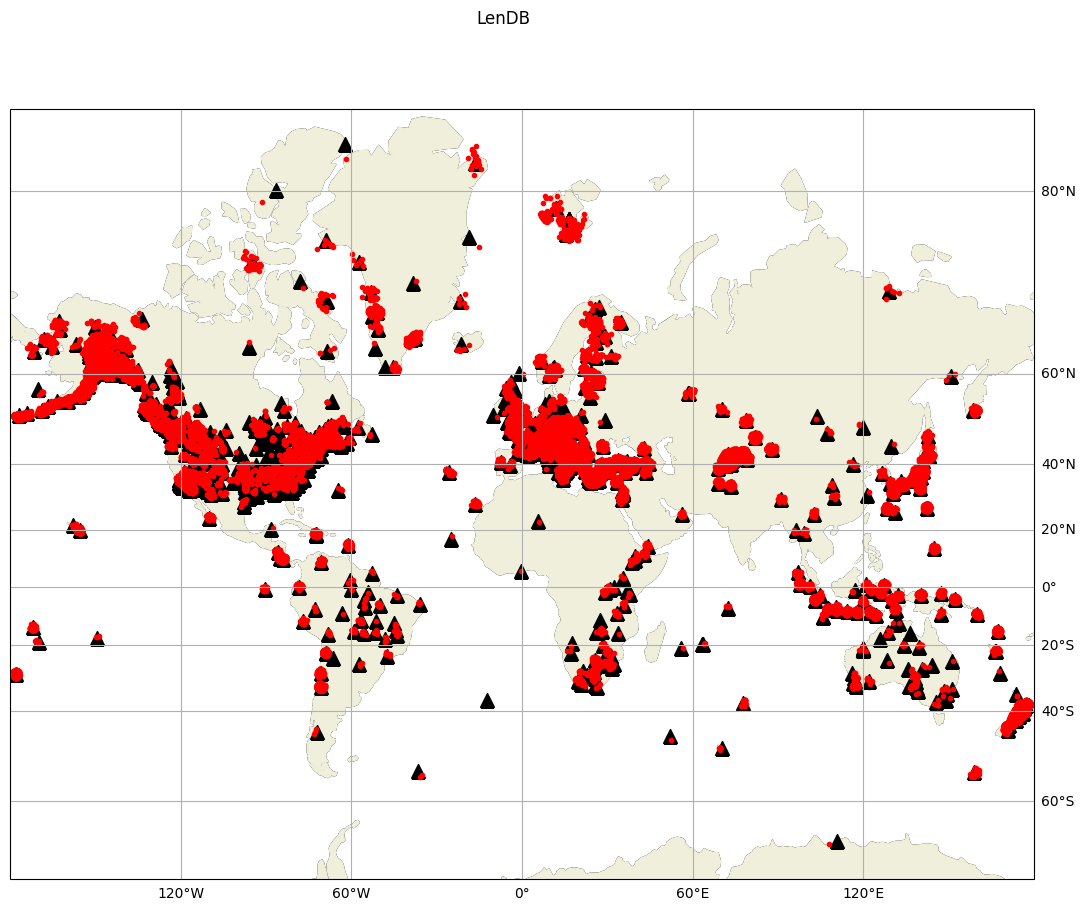

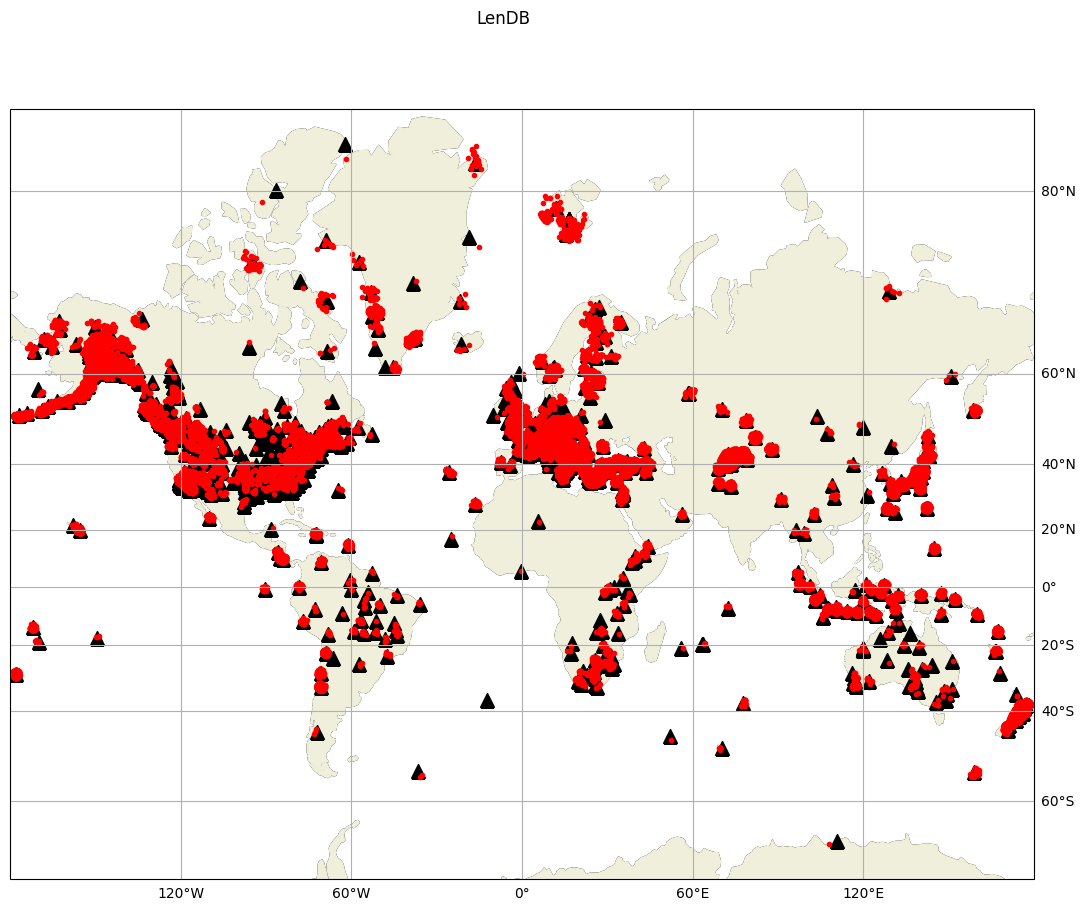

In [7]:
data.plot_map()

In [10]:
import seisbench.generate as sbg
import seisbench.models as sbm
import torch

model = sbm.PhaseNet()

In [4]:
if torch.cuda.is_available():
    model.cuda()
    print("Running on GPU")
else:
    print("Running on CPU")

Running on CPU


In [11]:
train, dev, test = data.train_dev_test()

phase_dict = {
    "trace_p_arrival_sample": "P",
    "trace_pP_arrival_sample": "P",
    "trace_P_arrival_sample": "P",
    "trace_P1_arrival_sample": "P",
    "trace_Pg_arrival_sample": "P",
    "trace_Pn_arrival_sample": "P",
    "trace_PmP_arrival_sample": "P",
    "trace_pwP_arrival_sample": "P",
    "trace_pwPm_arrival_sample": "P",
    "trace_s_arrival_sample": "S",
    "trace_S_arrival_sample": "S",
    "trace_S1_arrival_sample": "S",
    "trace_Sg_arrival_sample": "S",
    "trace_SmS_arrival_sample": "S",
    "trace_Sn_arrival_sample": "S",
}

In [12]:
import numpy as np

train_generator = sbg.GenericGenerator(train)
dev_generator = sbg.GenericGenerator(dev)

augmentations = [
    sbg.WindowAroundSample(
        list(phase_dict.keys()),
        samples_before=3000,
        windowlen=6000,
        selection="random",
        strategy="variable",
    ),
    sbg.RandomWindow(windowlen=3001, strategy="pad"),
    sbg.Normalize(demean_axis=-1, amp_norm_axis=-1, amp_norm_type="peak"),
    sbg.ChangeDtype(np.float32),
    sbg.ProbabilisticLabeller(
        shape="gaussian", label_columns=phase_dict, sigma=30, dim=0
    ),
]

train_generator.add_augmentations(augmentations)
dev_generator.add_augmentations(augmentations)

In [13]:
from seisbench.util import worker_seeding
from torch.utils.data import DataLoader

batch_size = 256
num_workers = 4  # The number of threads used for loading data

train_loader = DataLoader(
    train_generator,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    worker_init_fn=worker_seeding,
)
dev_loader = DataLoader(
    dev_generator,
    batch_size=batch_size,
    shuffle=False,
    num_workers=num_workers,
    worker_init_fn=worker_seeding,
)

In [14]:
learning_rate = 1e-2
epochs = 5

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


def loss_fn(y_pred, y_true, eps=1e-5):
    # vector cross entropy loss
    h = y_true * torch.log(y_pred + eps)
    h = h.mean(-1).sum(-1)  # Mean along sample dimension and sum along pick dimension
    h = h.mean()  # Mean over batch axis
    return -h


def train_loop(dataloader):
    size = len(dataloader.dataset)
    for batch_id, batch in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(batch["X"].to(model.device))
        loss = loss_fn(pred, batch["y"].to(model.device))

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_id % 5 == 0:
            loss, current = loss.item(), batch_id * batch["X"].shape[0]
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader):
    num_batches = len(dataloader)
    test_loss = 0

    model.eval()  # close the model for evaluation

    with torch.no_grad():
        for batch in dataloader:
            pred = model(batch["X"].to(model.device))
            test_loss += loss_fn(pred, batch["y"].to(model.device)).item()

    model.train()  # re-open model for training stage

    test_loss /= num_batches
    print(f"Test avg loss: {test_loss:>8f} \n")

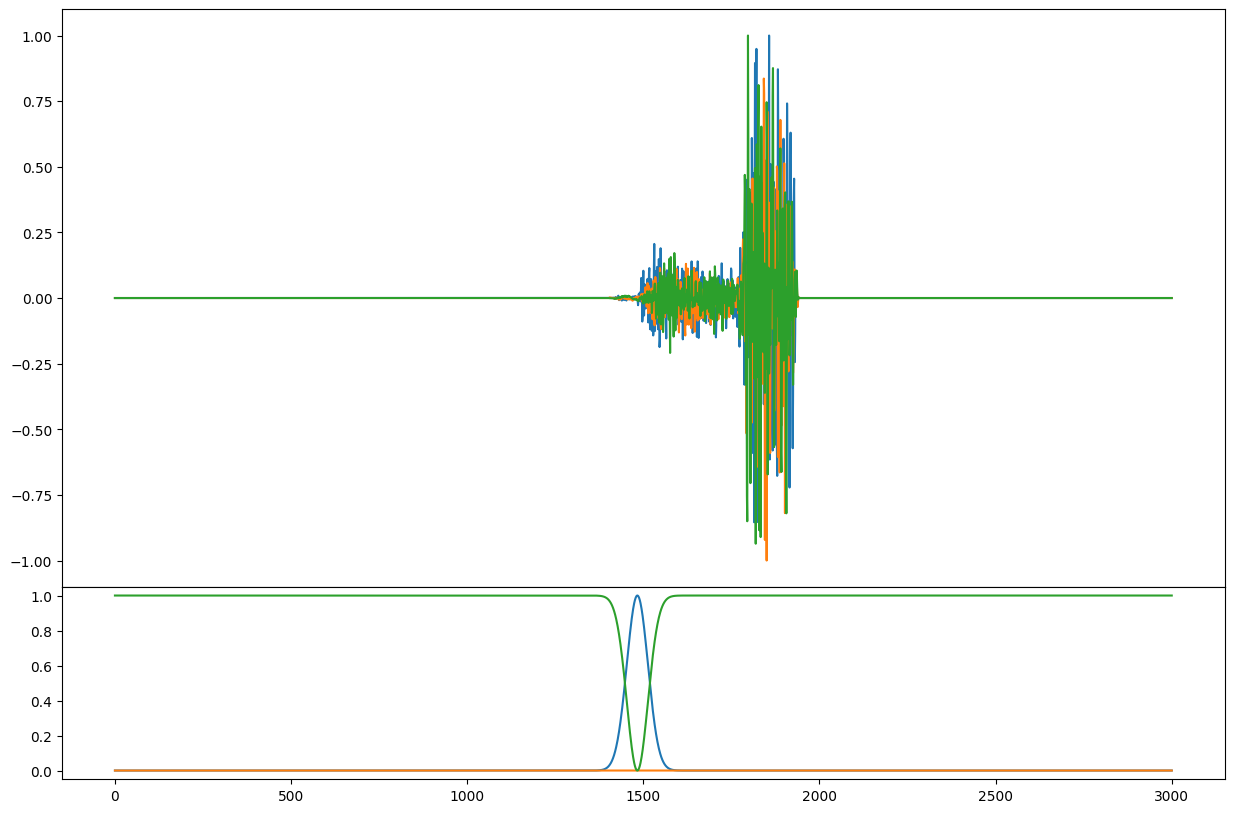

In [16]:
sample = train_generator[np.random.randint(len(train_generator))]

fig = plt.figure(figsize=(15, 10))
axs = fig.subplots(
    2, 1, sharex=True, gridspec_kw={"hspace": 0, "height_ratios": [3, 1]}
)
axs[0].plot(sample["X"].T)
axs[1].plot(sample["y"].T)

In [17]:
for t in range(epochs):
    print(f"Epoch {t + 1}\n-------------------------------")
    train_loop(train_loader)
    test_loop(dev_loader)

Epoch 1
-------------------------------
loss: 1.529824  [    0/746840]
loss: 1.024244  [ 1280/746840]
loss: 0.735834  [ 2560/746840]
loss: 0.529777  [ 3840/746840]


KeyboardInterrupt: 

{'X': tensor([[[  864.,   862.,   866.,  ...,   650.,   647.,   619.],
         [   94.,    98.,    94.,  ...,   151.,    54.,    53.],
         [  432.,   425.,   410.,  ...,   561.,   495.,   462.]],

        [[  435.,   427.,   415.,  ...,    49.,    11.,    60.],
         [  -65.,   -74.,   -81.,  ...,   -69.,  -130.,   -52.],
         [  474.,   468.,   460.,  ...,   292.,   339.,   384.]],

        [[  207.,   208.,   213.,  ...,   253.,   320.,   402.],
         [ -326.,  -329.,  -331.,  ...,   -50.,  -106.,    -8.],
         [  483.,   488.,   498.,  ...,   407.,   449.,   516.]],

        ...,

        [[  617.,   618.,   621.,  ...,   463.,   393.,   421.],
         [   37.,    36.,    29.,  ...,   -87.,   -11.,    33.],
         [  489.,   505.,   521.,  ...,   289.,   440.,   427.]],

        [[  252.,   254.,   253.,  ...,   825.,   554.,   167.],
         [ -119.,  -112.,  -103.,  ..., -1803.,   436.,  2616.],
         [  669.,   665.,   666.,  ...,  1665.,  1715., -1497.